In [1]:
from scipy.ndimage import maximum_filter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

IMAGE_SIZE = 256
MAX_POINTS = 100
MODEL_PATH = './models/v7.h5' 

model = load_model(MODEL_PATH, compile=False)

2025-01-09 11:42:40.098298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736433760.111805  215475 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736433760.115791  215475 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 11:42:40.130913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1736433761.499506  215475 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 23

In [10]:
def predict_heatmap(image_path):
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predicted_heatmap = model.predict(img_array)[0, :, :, 0]  
    
    print(predicted_heatmap.shape)
    
    return predicted_heatmap

def get_predicted_points(heatmaps, threshold=0.001):
    predicted_points = []
    for heatmap in heatmaps:
        filtered_heatmap = maximum_filter(heatmap, size=4)
        peaks = (heatmap == filtered_heatmap) & (heatmap > threshold)
        y_indices, x_indices = np.where(peaks)
        points = np.vstack((x_indices, y_indices)).T  
        predicted_points.append(points)
    return predicted_points

def visualize_prediction(image_path):
    predicted_heatmap = predict_heatmap(image_path)
    predicted_points = get_predicted_points([predicted_heatmap])[0]
    
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img) / 255.0
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img_array)
    plt.imshow(predicted_heatmap, cmap='jet', alpha=0.5)
    if len(predicted_points) > 0:
        plt.scatter(predicted_points[:, 0], predicted_points[:, 1], color='red', s=20)
    plt.title('Heatmap Predito e Pontos Detectados')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(256, 256)


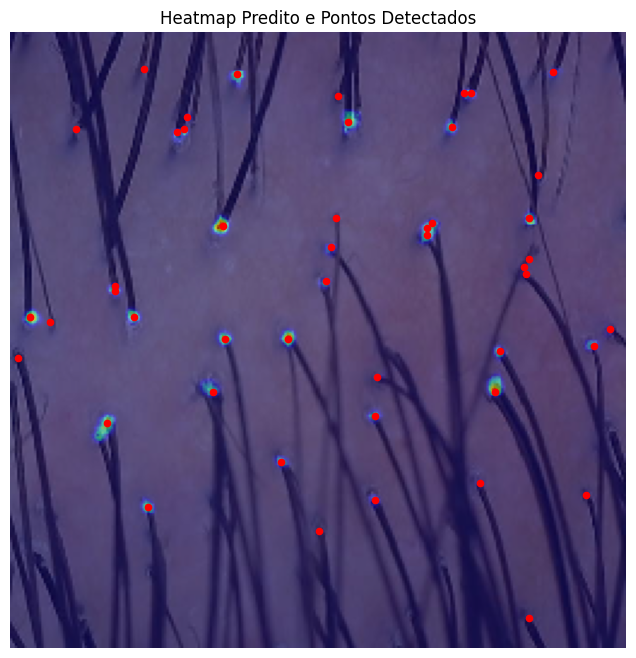

In [11]:
visualize_prediction('./dataset/e7b31cad-e8c9-4f8c-a36f-562721523960.png')